In [1]:
import mujoco
import numpy as np
import mediapy as media
import os

In [2]:
xml_path = os.path.join(os.path.dirname(os.path.abspath('')), 'SNS-Toolbox---Mujoco', 'Model','rat_hindlimb_2_muscle_model2.xml')

In [3]:
mujoco_model = mujoco.MjModel.from_xml_path(xml_path)
mujoco_data = mujoco.MjData(mujoco_model)

The model starts in a strange position, so lets change the starting pose to about what it is when the simulation is run and come to rest due gravity

In [4]:
qpos0 = np.array(
        [-3.68282993e-05, -0.5, -3.70508350e-03, -7.13907560e-02, -1.10120888e-04, -3.48792427e-01,
         6.44695547e-02, 2.61798590e-01, 2.26977693e-08, -1.34017271e-07, 5.12255158e-08, -4.89664471e-04,
         -7.18965174e-05, -1.00240646e-04])

mujoco_data.qpos = qpos0

mujoco.mj_forward(mujoco_model, mujoco_data)

Lets Take a look at the model

""

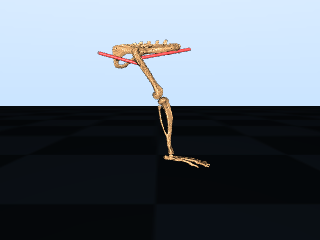

In [5]:
renderer = mujoco.Renderer(mujoco_model)
mujoco.mj_forward(mujoco_model,mujoco_data)
renderer.update_scene(mujoco_data, camera = 'fixed')
media.show_image(renderer.render())

TODO: 
- add muscles to control the knee
    - find matlab code to use fmincon to make the moment arm roughly equal to the full model
- lock the ankle joint
- copy Kaiyu's network over to sns-toolbox
    - talk to Evan